In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.multiclass import unique_labels

In [14]:
data = pd.read_csv("sentiment_analysis.csv")
print(f"number of rows are {data.shape[0]} and the number of columns are {data.shape[1]}")
print(data.columns)
print(data.head(5))
print(data.tail(5))
print(data.describe())

number of rows are 10 and the number of columns are 7
Index(['text', 'sentiment', 'Year', 'Month', 'Day', 'Time of Tweet',
       'Platform'],
      dtype='object')
                                                text sentiment  Year  Month  \
0                 I love this product! It's amazing.  positive  2023      5   
1       The service was terrible. Never coming back!  negative  2023      6   
2         It's okay, not the best but not the worst.   neutral  2023      7   
3  Absolutely fantastic experience! Would recommend.  positive  2023      8   
4            I didn't like the quality of this item.  negative  2023      9   

   Day Time of Tweet   Platform  
0   10         12:30    Twitter  
1   14         18:45   Facebook  
2   22         15:20  Instagram  
3    5         10:00    Twitter  
4   30         20:15   Facebook  
                                           text sentiment  Year  Month  Day  \
5                       Meh, it's just average.   neutral  2023     10   10  

In [42]:
print(data.info())
print()
print(data["Year"].nunique())
print()
print(data.Year.unique)
print()
print(data["Year"].dtype)
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           10 non-null     object
 1   sentiment      10 non-null     object
 2   Year           10 non-null     int64 
 3   Month          10 non-null     int64 
 4   Day            10 non-null     int64 
 5   Time of Tweet  10 non-null     object
 6   Platform       10 non-null     object
dtypes: int64(3), object(4)
memory usage: 692.0+ bytes
None

2

<bound method Series.unique of 0    2023
1    2023
2    2023
3    2023
4    2023
5    2023
6    2023
7    2023
8    2024
9    2024
Name: Year, dtype: int64>

int64



In [48]:
print(data["Year"].mode())
print()
print(data.mode())

0    2023
Name: Year, dtype: int64

                                                text sentiment    Year  Month  \
0  Absolutely fantastic experience! Would recommend.  positive  2023.0      1   
1             Great customer service, very friendly!       NaN     NaN      2   
2            I didn't like the quality of this item.       NaN     NaN      5   
3                 I love this product! It's amazing.       NaN     NaN      6   
4         It's okay, not the best but not the worst.       NaN     NaN      7   
5                            Meh, it's just average.       NaN     NaN      8   
6                    Not sure how I feel about this.       NaN     NaN      9   
7          Superb quality, exceeded my expectations!       NaN     NaN     10   
8       The service was terrible. Never coming back!       NaN     NaN     11   
9       Worst experience ever, totally disappointed.       NaN     NaN     12   

    Day Time of Tweet Platform  
0   5.0         08:50  Twitter  
1  10.

In [72]:
pos = data["sentiment"].value_counts()["positive"]/data["sentiment"].count()
print(pos*100,"%")
neg = data["sentiment"].value_counts()["negative"]/data["sentiment"].count()
print(neg*100,"%")
ntr = data["sentiment"].value_counts()["neutral"]/data["sentiment"].count()
print(ntr*100,"%")

40.0 %
30.0 %
30.0 %


In [ ]:

pst = data.loc[data["sentiment"]=="positive"]
print(pst)

ngt = data.loc[data["sentiment"]=="negative"]
print(ngt)

ntl = data.loc[data["sentiment"]=="neutral"]
print(ntl)

                                                text sentiment  Year  Month  \
0                 I love this product! It's amazing.  positive  2023      5   
3  Absolutely fantastic experience! Would recommend.  positive  2023      8   
6             Great customer service, very friendly!  positive  2023     11   
9          Superb quality, exceeded my expectations!  positive  2024      2   

   Day Time of Tweet Platform  
0   10         12:30  Twitter  
3    5         10:00  Twitter  
6    2         09:45  Twitter  
9   20         08:50  Twitter  
                                           text sentiment  Year  Month  Day  \
1  The service was terrible. Never coming back!  negative  2023      6   14   
4       I didn't like the quality of this item.  negative  2023      9   30   
7  Worst experience ever, totally disappointed.  negative  2023     12   18   

  Time of Tweet  Platform  
1         18:45  Facebook  
4         20:15  Facebook  
7         17:30  Facebook  
               

In [90]:
pst.describe()

,Year,Month,Day
count,4.00,4.000000,4.000000
mean,2023.25,6.500000,9.250000
std,0.50,3.872983,7.889867
min,2023.00,2.000000,2.000000
25%,2023.00,4.250000,4.250000
50%,2023.00,6.500000,7.500000
75%,2023.25,8.750000,12.500000
max,2024.00,11.000000,20.000000


In [92]:
ngt.describe()

,Year,Month,Day
count,3.0,3.0,3.000000
mean,2023.0,9.0,20.666667
std,0.0,3.0,8.326664
min,2023.0,6.0,14.000000
25%,2023.0,7.5,16.000000
50%,2023.0,9.0,18.000000
75%,2023.0,10.5,24.000000
max,2023.0,12.0,30.000000


In [94]:
ntl.describe()

,Year,Month,Day
count,3.000000,3.000000,3.000000
mean,2023.333333,6.000000,12.333333
std,0.577350,4.582576,8.736895
min,2023.000000,1.000000,5.000000
25%,2023.000000,4.000000,7.500000
50%,2023.000000,7.000000,10.000000
75%,2023.500000,8.500000,16.000000
max,2024.000000,10.000000,22.000000


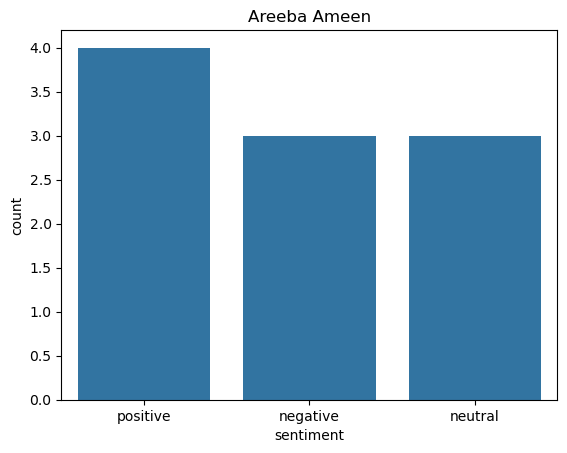

In [98]:
sns.countplot(x=data["sentiment"])
plt.title("Areeba Ameen")
plt.show()

In [ ]:
data.drop(columns=['Month','Day'],inplace=True,errors='ignore')
data.head()

,sentiment,Year,Time of Tweet,Platform
0,positive,2023,12:30,Twitter
1,negative,2023,18:45,Facebook
2,neutral,2023,15:20,Instagram
3,positive,2023,10:00,Twitter
4,negative,2023,20:15,Facebook


In [142]:
#data preprocessing or cleaning
def removeUrl(text):
    var = re.compile(r'https?://\S+|www\.\S+')
    return var.sub(' ',text).replace(' ',' ')

In [160]:
data["removeURL"] = data["sentiment"].apply(lambda x : removeUrl(x))
print(data.head(5))

  sentiment  Year Time of Tweet   Platform    clean1 punctRemove removeURL
0  positive  2023         12:30    Twitter  positive    positive  positive
1  negative  2023         18:45   Facebook  negative    negative  negative
2   neutral  2023         15:20  Instagram   neutral     neutral   neutral
3  positive  2023         10:00    Twitter  positive    positive  positive
4  negative  2023         20:15   Facebook  negative    negative  negative


In [164]:
punctuation = string.punctuation 
print(punctuation)

def removePunctuation(text):
    var2 = text.translate(str.maketrans(' ',' ',punctuation))
    return var2

#method call
data["punctRemove"] = data["removeURL"].apply(lambda x : removePunctuation(x))
print(data.head(5))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
  sentiment  Year Time of Tweet   Platform    clean1 punctRemove removeURL
0  positive  2023         12:30    Twitter  positive    positive  positive
1  negative  2023         18:45   Facebook  negative    negative  negative
2   neutral  2023         15:20  Instagram   neutral     neutral   neutral
3  positive  2023         10:00    Twitter  positive    positive  positive
4  negative  2023         20:15   Facebook  negative    negative  negative


In [186]:
#splitting
x,y = data["punctRemove"],data["sentiment"]

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.1 , random_state=42)
print(len(x_test))
print(len(x_train))
print(len(y_train))
print(len(y_test))

1
9
9
1


In [285]:
#classification and vectorization
vt = TfidfVectorizer()
cl = BernoulliNB()

var = Pipeline([('Vectorizer',vt),('Classifier',cl)])
var.fit(x_train,y_train)

Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                ('Classifier', BernoulliNB())])

In [287]:
prediction = var.predict(x_test)

#accuracy score,recall score,f1 score,preicison score

print(f"f1 is : {f1_score(y_test,prediction,average="weighted")}")
print(f"accuracy score : {accuracy_score(y_test,prediction)}")
print(f"precision score is : {precision_score(y_test,prediction,average="weighted")}")
print(f"recall score is : {recall_score(y_test,prediction,average="weighted")}")

f1 is : 1.0
accuracy score : 1.0
precision score is : 1.0
recall score is : 1.0


In [289]:
print(confusion_matrix(x_train,y_train))
print(classification_report(y_test,prediction))

[[3 0 0]
 [0 2 0]
 [0 0 4]]
              precision    recall  f1-score   support

     neutral       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [319]:
#classification and vectorization
vt = TfidfVectorizer()
cl = BernoulliNB()

var = Pipeline([('Vectorizer',TfidfVectorizer()),('Classifier',BernoulliNB())])
var.fit(x_train,y_train)


Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                ('Classifier', BernoulliNB())])

In [ ]:
#testing

str = ["I am happy now"]
pre = var.predict(str) 
print(pre)


['positive']


In [325]:
#classification and vectorization
vt = TfidfVectorizer()
cl = BernoulliNB()

var = Pipeline([('Vectorizer',TfidfVectorizer()),('Classifier',BernoulliNB())])
var.fit(x_train,y_train)


Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                ('Classifier', BernoulliNB())])

In [327]:
str2 = ["I said i am okay Leave me"]
rst = var.predict(str2)
print(rst)

['positive']


In [ ]:
#classification and vectorization
vt = TfidfVectorizer()
cl = BernoulliNB()

var = Pipeline([('Vectorizer',TfidfVectorizer()),('Classifier',BernoulliNB())])
var.fit(x_train,y_train)


In [335]:
str2 = ["i am sad"]
rst = var.predict(str2)
print(rst)

['positive']
